In [10]:
#Import necessary packages
import os
import time
import glob
import numpy as np
import pandas as pd
from skimage import io # To read image
from skimage.transform import resize # To resize image
from skimage.color import rgb2gray # To grayscale
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [9]:
# Make project folder as current working directory

print(os.getcwd())

C:\Users\sshahid3


In [15]:
# Function to resize and split the image into G,R and NIR bands
def read_images(image_path, width=224, height=224):
    """
    The function takes input of the image path, width, and height and returns
    resized RGB image containing G, R, and NIR bands along with its label.
    """
    
    # Opening an image using skimage
    img = io.imread(image_path)
    
    # Selecting G, R, and NIR bands (B03, B04, and B08)
    img_bands = img[:, :, [2, 3, 7]]
    
    # Resize the image
    img_resize = resize(img_bands, (width, height))
    
    # Get the label of the image
    label = os.path.basename(image_path).split('_')[0]  # Extract label from filename
    
    return img_resize, label

In [16]:
# Get the class directories
image_paths = glob.glob(r"C:\Users\sshahid3\OneDrive - Saint Louis University\Machine Learning\OneDrive-2023-10-26\data_EuroSAT\*\*")

# Note:
# glob allows us to get the nested file paths in one line of code.
# The * indicates that take everything inside that folder.

In [17]:
# Check image_paths 
image_paths

['C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_447.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_451.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_452.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_454.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_455.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_456.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis University\\Machine Learning\\OneDrive-2023-10-26\\data_EuroSAT\\Forest\\Forest_457.tif',
 'C:\\Users\\sshahid3\\OneDrive - Saint Louis Un

In [18]:
%%time

# Create two empty lists that will store the images and labels while we loop
images = []
labels = []

# Run the loop and keep storing the data
for image_path in image_paths:
    image, label = read_images(image_path)
    images.append(image)
    labels.append(label)

CPU times: total: 26.2 s
Wall time: 27.6 s


In [21]:
# Divide the final images in the images list by 32768 to rescale them to the range [0, 1]
images = [image / 32768 for image in images]



In [22]:
# Convert the lists to np arrays
X = np.array(images)
y = np.array(labels)

In [23]:
# Check the shape of X and y
print(X.shape)
print(y.shape)

(1858, 224, 224, 3)
(1858,)


In [24]:
# Encode y label, convert the string label to integers
enc = LabelEncoder()

enc.fit(y)

y_enc = enc.transform(y)
n_classes = len(list(np.unique(y_enc)))

y_1hot = to_categorical(y_enc, n_classes)

print("Encoded Values")
print(np.arange(0, n_classes))
print(list(enc.inverse_transform(np.arange(0, n_classes))))

Encoded Values
[0 1 2 3 4]
['Forest', 'Industrial', 'PermanentCrop', 'Residential', 'River']


In [25]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_1hot, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Check Min Max of Xs
print("Max of X_train: ", np.max(X_train))
print("Min of X_train: ", np.min(X_train))
print("Max of X_test: ", np.max(X_test))
print("Min of X_test: ", np.min(X_test))

(1300, 224, 224, 3)
(1300, 5)
(558, 224, 224, 3)
(558, 5)
Max of X_train:  1.3039159285279043e-05
Min of X_train:  5.702774710930102e-08
Max of X_test:  1.174120129873447e-05
Min of X_test:  6.196715827624825e-08


In [27]:
#Check the dimensions of testing and training dataset
X_train = X_train.reshape(1300, 224, 224, 3)
X_test = X_test.reshape(558, 224, 224, 3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1300, 224, 224, 3)
(1300, 5)
(558, 224, 224, 3)
(558, 5)


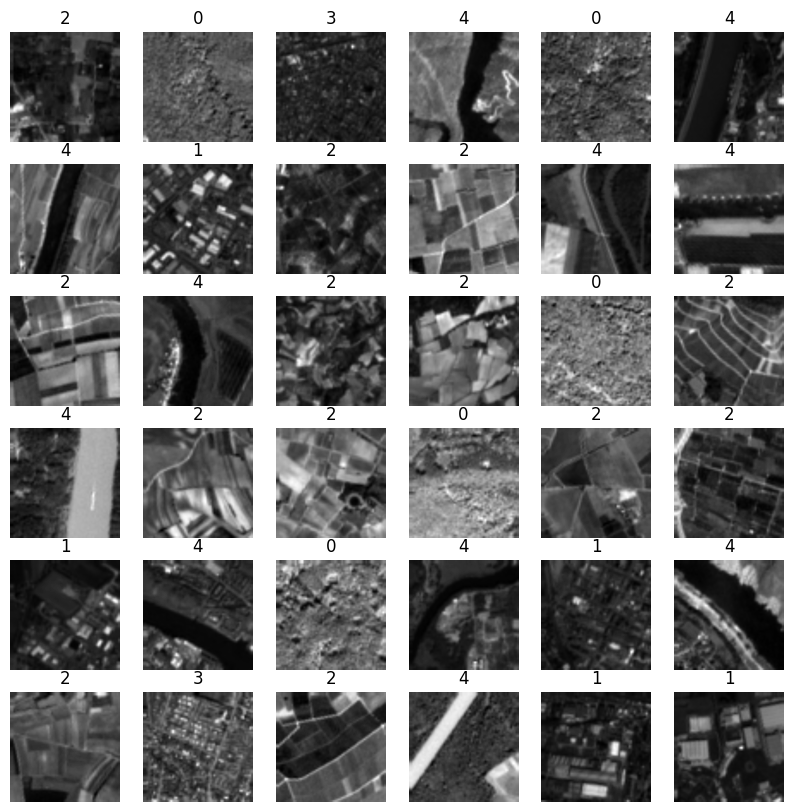

In [28]:
fig, ax = plt.subplots(6, 6, figsize=(10, 10))

count = 0

for i in range(6):
    for j in range(6):
        
        if count > 36:
            break
        
        ax[i,j].imshow(X_train[count, :, :, 0], cmap='gray')  #Plot
        ax[i,j].set_title(np.argmax(y_train[count])) # Give title
        
        ax[i,j].axis('off') # Turn off axis
        
        count = count + 1

plt.show()

In [ ]:
%%time

# Save the data
np.save(r'eurosat_X_train.npy', X_train)
np.save(r'eurosat_X_test.npy', X_test)
np.save(r'eurosat_y_train.npy', y_train)
np.save(r'eurosat_y_test.npy', y_test)